# **Movie Genres Classification**
*Predicting the genre of movie from just 1000 characters of the script.*

*Dataset Link: https://www.kaggle.com/c/moviegenres/overview*

In [4]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [50]:
# Loading the dataset
df = pd.read_csv('./kaggle_movie_train.csv')

# **Exploring the dataset**

In [51]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [52]:
df.shape

(22579, 3)

In [53]:
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


In [54]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

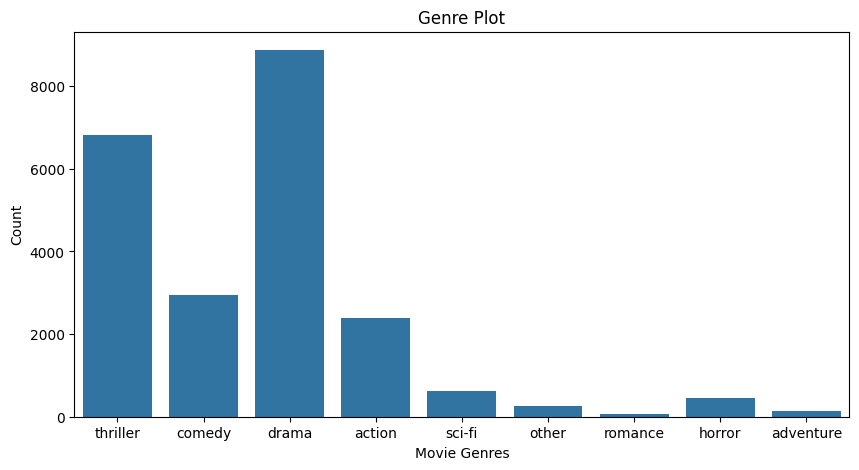

In [55]:
# Visualizing the count of 'genre' column from the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='genre', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

# **Data Cleaning and Preprocessing**

In [10]:
# Finding unique genres
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [12]:
# Mapping the genres to values
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [13]:
# Finding any NaN values
df.isna().any()

id       False
text     False
genre    False
dtype: bool

In [14]:
# Removing the 'id' column
df.drop('id', axis=1, inplace=True)
df.columns

Index(['text', 'genre'], dtype='object')

In [15]:
# Importing essential libraries for performing Natural Language Processing on given dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\Amad
[nltk_data]     Irfan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
df.shape

(22579, 2)

In [17]:
# Cleaning the text
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):

  # Cleaning special character from the dialog/script
  dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])

  # Converting the entire dialog/script into lower case
  dialog = dialog.lower()

  # Tokenizing the dialog/script by words
  words = dialog.split()

  # Removing the stop words
  dialog_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in dialog_words]

  # Joining the stemmed words
  dialog = ' '.join(words)

  # Creating a corpus
  corpus.append(dialog)

In [18]:
corpus[0:10]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [19]:
df[df['genre']==4].index

Index([    2,     4,     7,    10,    11,    12,    13,    14,    15,    16,
       ...
       22553, 22560, 22561, 22563, 22564, 22567, 22568, 22571, 22574, 22575],
      dtype='int64', length=8873)

In [20]:
len(corpus)

22579

In [21]:
drama_words = []
for i in list(df[df['genre']==4].index):
  drama_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==1].index):
  action_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==3].index):
  comedy_words.append(corpus[i])

drama = ''
action = ''
comedy = ''
for i in range(0, 3):
  drama += drama_words[i]
  action += action_words[i]
  comedy += comedy_words[i]

In [22]:
print(drama)
print(action)
print(comedy)

come surpris take hand lead hallway salvator look feel pang seem smaller age wither bodi slightli stoop hair gather knot back head must tire want rest time funer salvator interrupt mamma take hour air know maria smile iron tell year salvator get messag feel guilti think seem incred never come maria open door step asid let son whisper put thing go go salvator lake step flabbergast sight old room perfectli reconstruct preserv look like museum museum past despit bed cloth cupboard book shelv perfectli clear one ever livend dismount children reach throw arm embrac charlott hurri behind martin lock eye envelop hug children ext fresh water plantat even summer oak tree cover leav martin hous partial rebuilt habit workshop alreadi complet martin children nathan samuel margaret william play tall grass front hous two great dane charlott sit front porch nurs infant martin walk workshop trail susan carri complet rock chair chair work art thin light spider web perfectli turn wood nail glue step ont

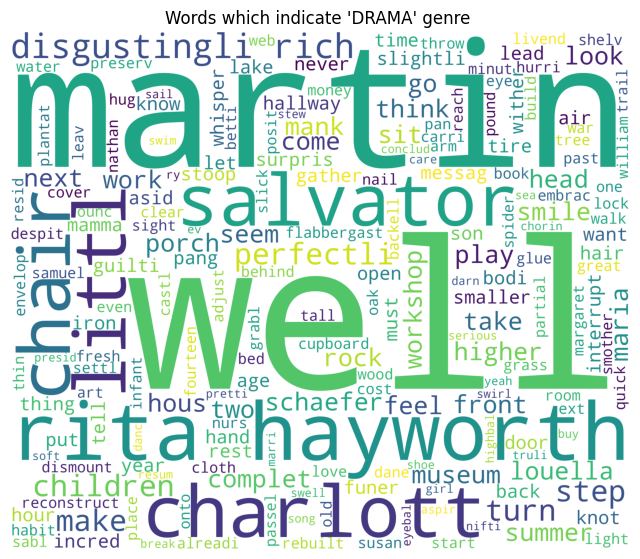

In [23]:
# Creating wordcloud for drama genre
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()

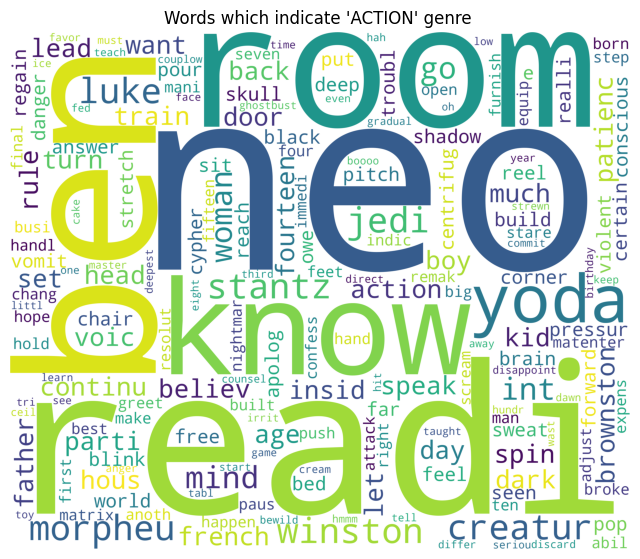

In [24]:
# Creating wordcloud for action genre
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre ")
plt.show()

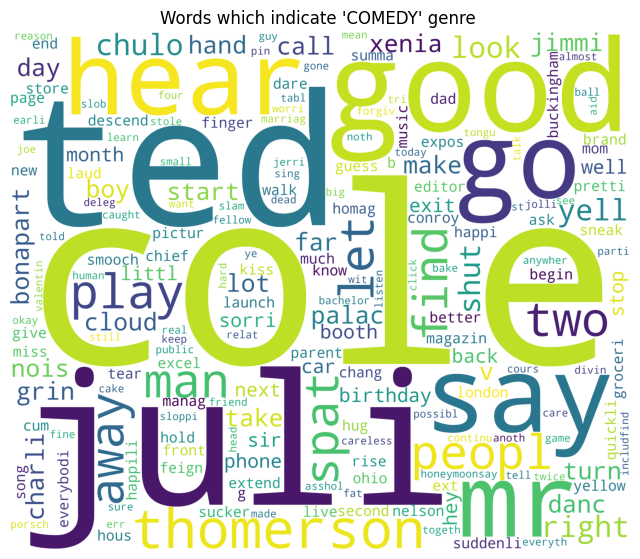

In [25]:
# Creating wordcloud for comedy genre
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate 'COMEDY' genre ")
plt.show()

The CountVectorizer is a feature extraction method used to convert a collection of text documents into a bag-of-words (BoW) model, which represents the frequency of words or n-grams in each document.

In [26]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [27]:
y = df['genre'].values

# **Model Building**

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


## *Multinomial Naive Bayes*

<p> The Multinomial Naive Bayes algorithm is a classification technique based on Bayes' Theorem. It is particularly well-suited for text classification tasks where the features are discrete counts, such as word frequencies in a document.
</p>


In [29]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [30]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [31]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,precision_score,recall_score
accuracy_score = accuracy_score(y_test, nb_y_pred)
recall_score = recall_score(y_test, nb_y_pred, average='micro')
f1_score = f1_score(y_test, nb_y_pred, average='micro')
precision_score = precision_score(y_test, nb_y_pred, average='micro')
print("---- Score ----")
print("Accuracy score is: {}%".format(round(accuracy_score*100,2)))
print("recall score is: {}%".format(round(recall_score*100,2)))
print("f1 score is: {}%".format(round(f1_score*100,2)))
print("precision score is: {}%".format(round(precision_score*100,2)))

---- Score ----
Accuracy score is: 89.57%
recall score is: 89.57%
f1 score is: 89.57%
precision score is: 89.57%


In [32]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [33]:
nb_cm

array([[  62,    1,    0,    0,    1,    2,    0,    0,    0],
       [   0,  450,    0,    8,    6,    1,    0,    0,   11],
       [   0,    2,   41,    0,    1,    0,    0,    0,    1],
       [   0,    7,    0,  517,   18,    2,    0,    4,   11],
       [   3,   41,    1,   37, 1607,   21,    2,   11,  104],
       [   0,    1,    0,    1,    4,   73,    0,    0,    3],
       [   0,    1,    0,    0,    0,    0,   10,    0,    0],
       [   0,    2,    0,    1,    7,    1,    0,  114,    7],
       [   0,   14,    0,   21,   78,   12,    0,   22, 1171]])

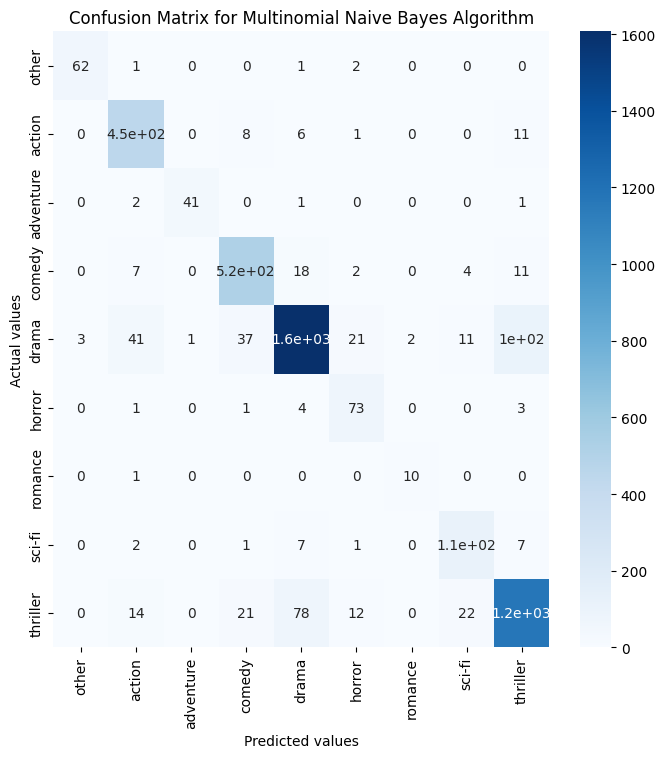

In [56]:
# Plotting the confusion matrix
plt.figure(figsize=(8,8))
axis_labels = ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [35]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  # score = accuracy_score(y_test, temp_y_pred)
  # print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
#   if score>best_accuracy:
#     best_accuracy = score
#     alpha_val = i
# print('--------------------------------------------')
# print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

In [37]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

# **Predictions**

In [38]:
def genre_prediction(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)

  temp = cv.transform([final_script]).toarray()
  return classifier.predict(temp)[0]

In [39]:
# For generating random integer
from random import randint

In [40]:
# Loading test dataset
test = pd.read_csv('./kaggle_movie_test.csv')
test.columns

Index(['id', 'text'], dtype='object')

In [41]:
test.shape

(5589, 2)

In [42]:
test.drop('id', axis=1, inplace=True)
test.head(10)

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."
5,im from ear to ear. Ya want me to make a state...
6,"BEN We need to help Reed Sue shakes her head,..."
7,slowly. At the entrance to the alley stands a ...
8,edge of the field. Neil steps closer. THE TOMB...
9,"special, take ya in the kitchen and suck your ..."


In [43]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: on his shoulder. A close shot of the Changeling's hand shows it still bloody, the blood running onto the cloth of Colwyn's jacket. EXT. STREAM NEAR STONEHENGE INTERCUT NIGHT The Cyclops stands near the spot where the real Seer was killed. He moves downstream a few yards and suddenly sees the Seer's body floating in the water, caught against the rocks. He realizes immediately that the band is in great danger he races up the path toward the camp. As Colwn leads the Changeling down the path, we see the hand on his shoulder turn into a claw . The claw is moving toward his neck when suddenly the Cyclops bursts from the trees in front of them. Colwyn stares in disbelief as the Cyclops hurls his trident straight at him. The weapon whistles past his ear and slices off the Changeling's arm at the shoulder. Colwyn spins, sees the red eyes, ducks backward as the Changeling swipes at him with his other hand now become a claw. He draws his glaive as the Changeling reverts entirely to bestia

In [44]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: st appearance, LUIS has successfully transformed himself into a SCREAMING QUEEN jaguar print silk evening jacket, deerskin gloves, a felt hat, fur lined knee high boots, aviator sunglasses... LIBERACE, EAT YOUR HEART OUT! PATRICK V.O. Oh... my... god. LUIS smiles expectantly, thrilled to have found his MAN LUIS Patrick? Hello? PATRICK Don't make me say it, Luis. PATRICK casually looks over at LUIS, taking it all in stride... even LUIS' presence can't make PATRICK forgot how fucking cool, how utterly desirable the MANNEQUIN's designer threads really are. PATRICK has to have that goddamned SUIT! LUIS Patrick? What do you mean? PATRICK I'm ignoring you, Luis. Can't you tell? I'm ignoring you. LUIS carefully removes his expensive, yet hideous gloves LUIS Patrick, can't we just talk? THROWING them at PATRICK, hitting him in the head. LUIS CONT'D Patrick look at me! PATRICK does his best to ignore LUIS' little outburst PATRICK There is nothing, nothing to talk LUIS interrupting We ca

In [45]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script:  looks up. CON ED GUY CONT'D giving the thumbs up Go for it! Ed continues down the street. People YELL to him Good luck tonight, We're rooting for you etc. A STREET CHARACTER walks alongside for a minute. STREET CHARACTER Hey, man. This is Haitian Love Juice. he produces a vial You give her this, she be yours. Security grabs him and the vial falls and breaks. The liquid hits the pavement and smokes up. ED looking at the smoke Jesus! More shouts Be gentle , We'11 be watching , Use a condom etc. A SCHOOL BUS passes. The KIDS YELL out the window to Ed. KIDS in unison Good luck! 146 EXT. MOVIE THEATRE NIGHT There is no line. At TICKET TAKER sits, bored. No one is going in or coming out. 147 EXT. STREET It's deserted. 148 EXT. RESTAURANT It's empty. The HEADWAITER stands in the doorway with nothing to do. 149 INT. LIVING ROOM A PARTY is in progress. The TV is on. On TV Ed is in a liquor store, buying a bottle of wine. Ed is dressed for his date. The people at the party are watching 

In [46]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: ed in the desert. PRESIDENT sweating How much time is left? 263 EXT. SPACE Earth is in view. The Dark Planet fills the screen and heads for the blue planet. 264 INT. PRESIDENT'S OFFICE SCIENTIST About nine minutes. President Lindberg has trouble breathing. 265 INT. TEMPLE Lit by torches, Korben sets Leeloo delicately on the altar in the exact center of the four elements. Cornelius looks over the four Stones every which way. CORNELIUS panic stricken Uh, this one... must be water! It's obvious he doesn't know where to put it. KORBEN Don't tell me you don't know how all this works? CORNELIUS Theoretically, yes! The four Stones form the beam and the Fifth Element is supposed to stand in the middle there, but... I don't have the reference book. I've never seen the Stones work! Korben can't believe his ears. He tears the Stone out of Cornelius' hand and studies the inscriptions. He goes over to one of the four bases the stones rest on and tries to figure it out. The symbol of air is 

In [47]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script:  to count out notes and coins. GRAY CONT'D Let me see five and five then in gold six all together. Shall we say sixteen pounds, Joseph? Joseph, with the glass still at his lips, nods his head. Gray looks about as if seeking a point of vantage then carefully sets himself in a straight backed chair, facing and a little to the side of Joseph's chair. Joseph is in a low cushioned chair. Gray, being above him, almost seems to hover over him. Gray leans forward to give him the money. JOSEPH I have made you give me money, but you smile. Aren't you angry? GRAY No, Joseph. I'm not angry here another glass of brandy I'll wager it's better than the doctor's. This time Gray fills Joseph's glass and drabbles a few drops into his own, but doesn't bother to pick it up. GRAY CONT'D Drink up, man! The liquor has begun to affect Joseph. He takes the third glass eagerly and drains it while Gray watches him in silence. As he puts the glass down, Gray begins to speak. GRAY CONT'D I have an idea a s